In [ ]:
###### Test Cluster View

In [1]:
%pylab inline
import numexpr as ne
import seaborn as sns
from ipywidgets import interact
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
ne.set_num_threads(32)

8

In [4]:
import sys
sys.path.append('../../../')
from spiketag.view import cluster_view

In [5]:
%gui qt

In [6]:
from spiketag.mvc import Sorter

In [8]:
nCh=32
fs = 25000
app = Sorter('/Users/chiy/Documents/HHMI/Github/spiketag/spiketag_test_data/pcie.bin', '/Users/chiy/Documents/HHMI/Github/spiketag/spiketag_test_data/pcie_spktag.bin')

[INFO/MainProcess] load mua data


#############  load data  ###################
/Users/chiy/Documents/HHMI/Github/spiketag/spiketag_test_data/pcie.bin loaded, it contains: 
30150587 * 32 points (3859275136 bytes) 
32 channels with sampling rate of 25000.0000 
1206.023 secs (20.100 mins) of data
#############################################


[INFO/MainProcess] load spktag file


In [ ]:
c = cluster_view()

In [ ]:
c.set_data(app.model.clu[26])

In [ ]:
c.build()

In [ ]:
c.show()

In [ ]:
###### Test Sorter

In [9]:
app.run()

In [15]:
from vispy.plot import Fig

In [36]:
fig = Fig()

In [37]:
ax = fig[0,0]

AttributeError: 'PlotWidget' object has no attribute 'scatter'

In [19]:
bx = fig[0,1]
cx = fig[1,0]
dx = fig[1,1]
bx.plot([[0,1],[0,1]])
cx.plot([[0,1],[0,1]])
dx.plot([[0,1],[0,1]])

In [24]:
time26 = app.model.spktag.t[app.model.spktag.ch == 26]

In [28]:
app.model.mua.data[time26,26]

array([ -194.82159424, -1094.70239258,  -227.12237549, ...,  -289.76824951,
        -175.74151611,  -320.08843994], dtype=float32)

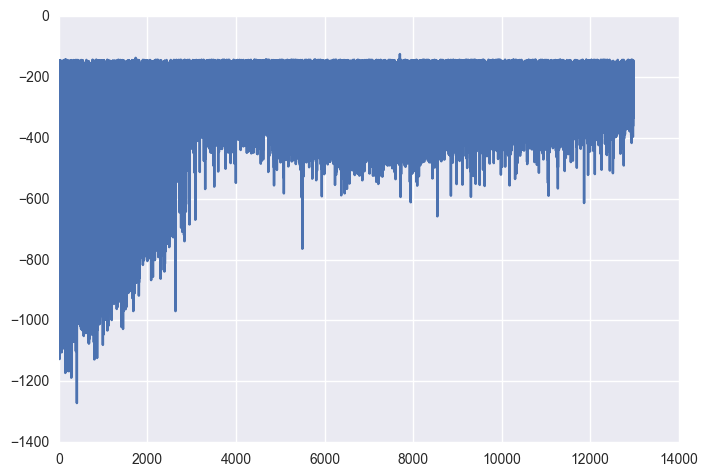

In [29]:
plot(app.model.mua.data[time26,26])

In [47]:
 app.model.spktag.t[app.model.spktag.ch == 30].shape

(42757,)

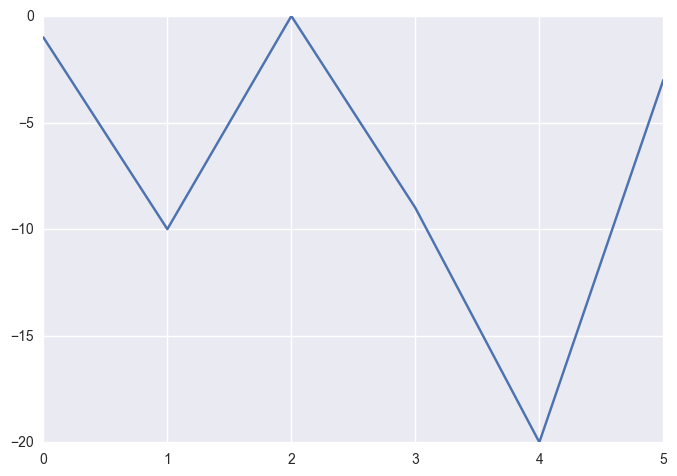

In [48]:
plot([-1,-10,0,-9,-20,-3])

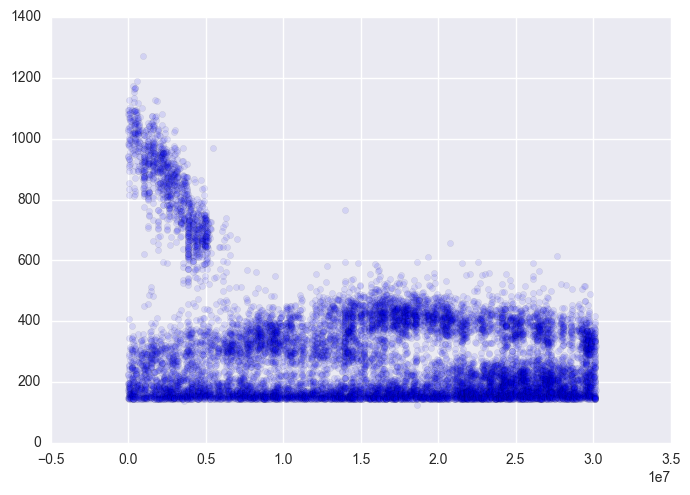

In [183]:
scatter(time26,abs(app.model.mua.data[time26,26]), alpha=0.1)

In [66]:
data26 = app.model.mua.data[time26,26]

In [67]:
amplitude26 = data26 / (data26.max() - data26.min())

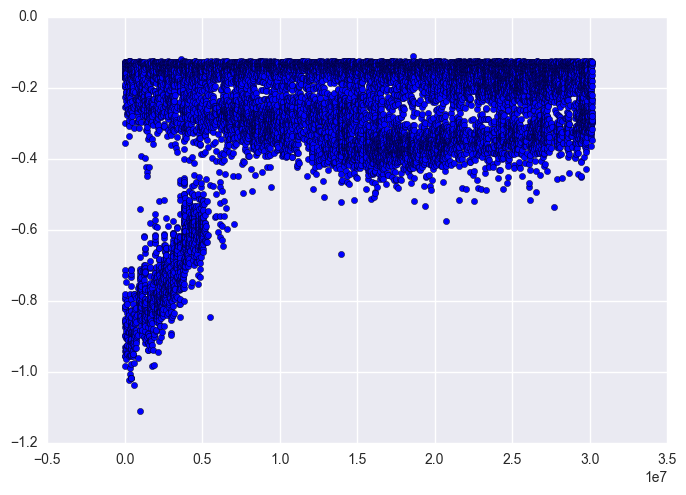

In [68]:
scatter(time26,amplitude26)

In [87]:
std = amplitude26.std()

0.16997404

In [94]:
index = np.where(amplitude26 < np.median(amplitude26) - 3 * std)

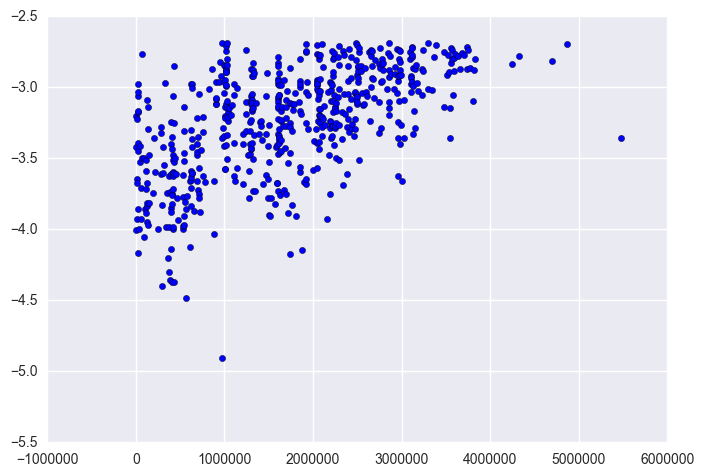

In [95]:
scatter(time26[index],amplitude26new[index])

In [97]:
np.random.randint(1,6,(1203,)).shape

(1203,)

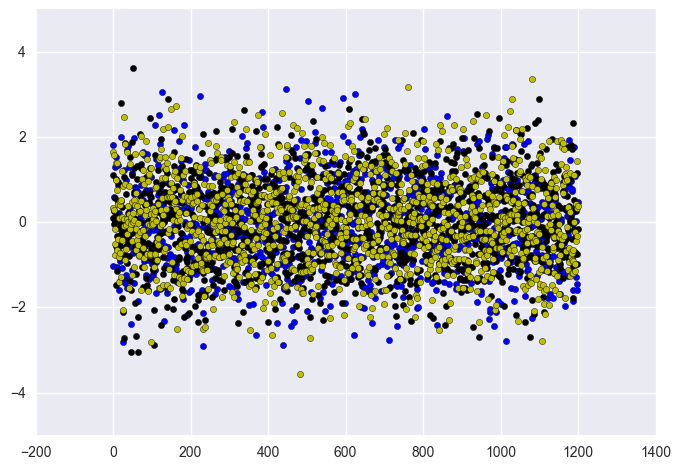

In [122]:
scatter(range(1200),np.random.randn(1200,))
scatter(range(1200),np.random.randn(1200,),c='k')
scatter(range(1200),np.random.randn(1200,),c='y')

In [111]:
np.random.randn(3,)

array([-0.97169896, -1.45149854,  1.00371112])

In [123]:
time26

array([     471,     1205,     3206, ..., 30144885, 30147077, 30149333], dtype=int32)

In [124]:
np.where(time26<25000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),)

In [133]:
time26[(time26>=25000) & (time26<50000)]

array([25868, 26235, 26420, 27881, 28061, 28179, 28378, 28632, 29019,
       30748, 31838, 32991, 34861, 35726, 36223, 37208, 37533, 39081,
       41856, 45142, 45522, 47631], dtype=int32)

In [135]:
s_data = np.array([])
for i in range(1025):
    t = time26[(time26 >= i*25000) & (time26 <= (i+1)*25000)]
    m = app.model.mua.data[t,26].mean()
    s_data = np.append(s_data,m)

/Users/chiy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice.


In [136]:
s_data

array([-534.50073242, -529.59759521, -466.3767395 , ..., -238.4118042 ,
       -267.37283325, -236.06710815])

In [138]:
s_data.shape

(1025,)

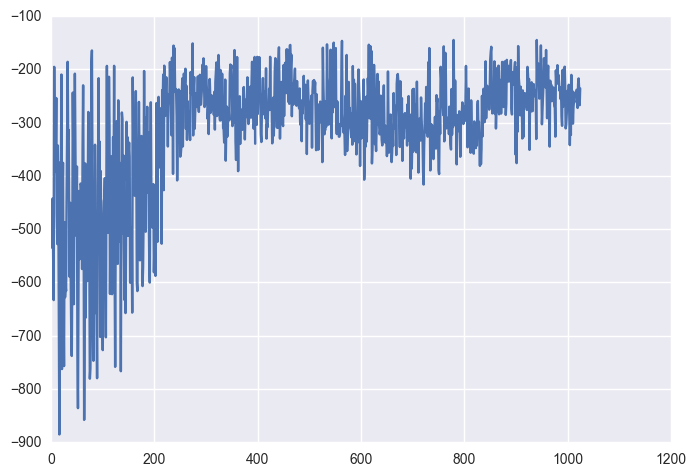

In [140]:
plot(range(1025),s_data)

In [144]:
clu26 = app.model.clu[26]

In [170]:
def meanspikes(time):
    s_data = np.array([])
    print time
    for i in range(1025):
        t = time[(time >= i*25000) & (time <= (i+1)*25000)]
        m = app.model.mua.data[t,26].mean()
        s_data = np.append(s_data,m)
    return s_data

In [180]:
clu26_0 = time26[clu26.index[0]]
clu26_1 = time26[clu26.index[1]]
clu26_2 = time26[clu26.index[2]]
clu26_3 = time26[clu26.index[3]]
clu26_4 = time26[clu26.index[4]]
s_0 = meanspikes(clu26_0)
s_1 = meanspikes(clu26_1)
s_2 = meanspikes(clu26_2)
s_3 = meanspikes(clu26_3)
s_4 = meanspikes(clu26_4)

/Users/chiy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: Mean of empty slice.


In [173]:
s_1

array([-325.25698853,           nan, -248.30267334, ...,           nan,
                 nan,           nan])

In [179]:
def meanspikes(time):
    s_data = np.array([])
    for i in range(1025):
        t = time[(time >= i*12500) & (time <= (i+1)*12500)]
        m = app.model.mua.data[t,26].mean()
        s_data = np.append(s_data,m)
    return s_data

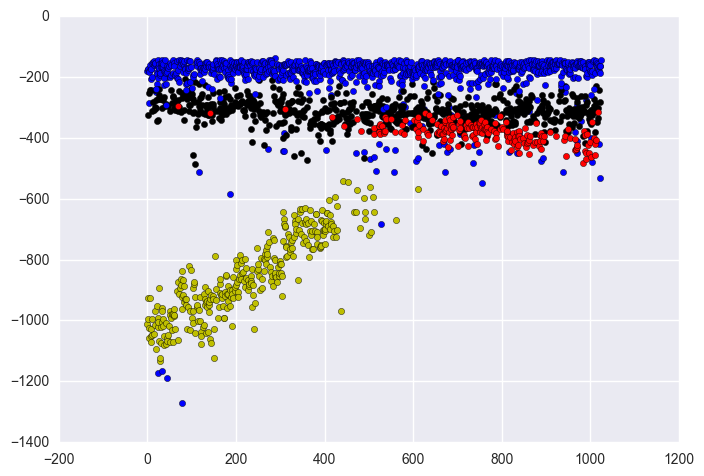

In [181]:
scatter(range(1025),s_0)
scatter(range(1025),s_1,c='k')
scatter(range(1025),s_2,c='y')
scatter(range(1025),s_3,c='b')
scatter(range(1025),s_4,c='r')

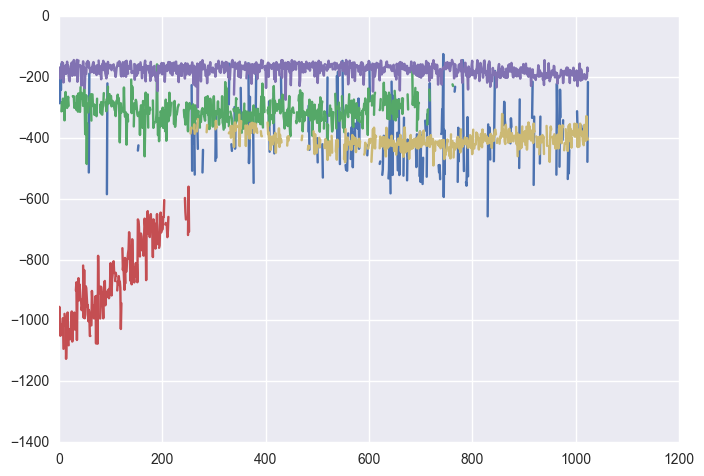

In [177]:
plot(range(1025),s_0)
plot(range(1025),s_1)
plot(range(1025),s_2)
plot(range(1025),s_3)
plot(range(1025),s_4)

In [184]:
clu26_0

array([   60719,    96684,   111839,   145830,   148308,   249701,
         275393,   284835,   297219,   412291,   473995,   554492,
         561553,   571702,   971926,  1178424,  1231473,  1458943,
        1476336,  2257466,  2287452,  2344163,  2347647,  2363119,
        2467529,  3401124,  3600115,  3722906,  3846530,  3847819,
        3852114,  3852805,  3870143,  4065646,  4598415,  5059144,
        5192671,  5435894,  5783088,  5907209,  5909975,  6070335,
        6132715,  6282782,  6399415,  6426433,  6471777,  6543501,
        6545353,  6548340,  6573364,  6577138,  6588108,  6715247,
        6744662,  6811008,  6966196,  6997321,  7079880,  7172189,
        7217072,  7270540,  7420588,  7479024,  7576152,  7613462,
        7617541,  7641029,  7714901,  7754390,  7758865,  7802587,
        7807764,  7917365,  8069722,  8180991,  8186360,  8233469,
        8244300,  8248138,  8250191,  8368141,  8376939,  8395137,
        8466720,  8515236,  8521179,  8537778,  8561768,  8570

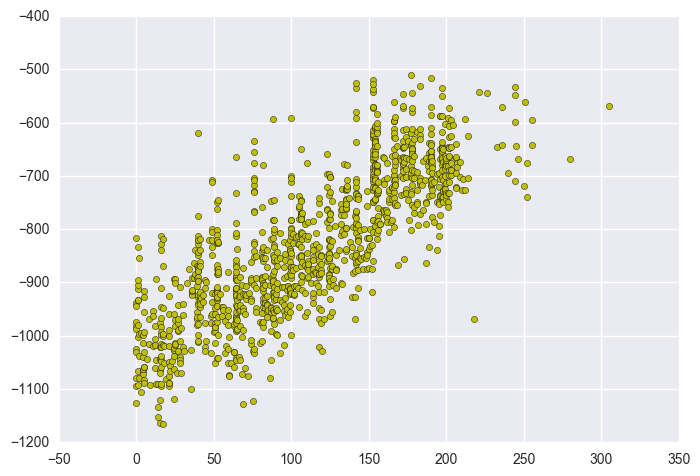

In [200]:
scatter(clu26_0/25000,app.model.mua.data[clu26_0,26])
scatter(clu26_1/25000,app.model.mua.data[clu26_1,26],c='k')
scatter(clu26_2/25000,app.model.mua.data[clu26_2,26],c='y')
# scatter(clu26_3/25000,app.model.mua.data[clu26_3,26],c='b')
# scatter(clu26_4/25000,app.model.mua.data[clu26_4,26],c='r')

In [195]:
clu26_0

array([   60719,    96684,   111839,   145830,   148308,   249701,
         275393,   284835,   297219,   412291,   473995,   554492,
         561553,   571702,   971926,  1178424,  1231473,  1458943,
        1476336,  2257466,  2287452,  2344163,  2347647,  2363119,
        2467529,  3401124,  3600115,  3722906,  3846530,  3847819,
        3852114,  3852805,  3870143,  4065646,  4598415,  5059144,
        5192671,  5435894,  5783088,  5907209,  5909975,  6070335,
        6132715,  6282782,  6399415,  6426433,  6471777,  6543501,
        6545353,  6548340,  6573364,  6577138,  6588108,  6715247,
        6744662,  6811008,  6966196,  6997321,  7079880,  7172189,
        7217072,  7270540,  7420588,  7479024,  7576152,  7613462,
        7617541,  7641029,  7714901,  7754390,  7758865,  7802587,
        7807764,  7917365,  8069722,  8180991,  8186360,  8233469,
        8244300,  8248138,  8250191,  8368141,  8376939,  8395137,
        8466720,  8515236,  8521179,  8537778,  8561768,  8570

In [214]:
a = np.array([[1,2],[3,4]])
b = np.array([1,1,1,1])
c = np.array([2,2,2,2])

In [215]:
bb = np.tile(b,(a.shape[0],1))

In [216]:
cc = np.tile(c,(a.shape[0],1))

In [221]:
dd =  np.array([])

In [222]:
np.concatenate((dd,cc))

ValueError: all the input arrays must have same number of dimensions